## Final Project Submission

Please fill out:
* Student name: Jonathan Yater and Lotus Baumgarner
* Student pace: Full time
* Scheduled project review date/time: Feb. 16, 2024
* Instructor name: Joseph Mata
* Blog post URL:


In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import zipfile
import pickle

# Here you can the clean up process of the Movie Dataset Database.

In [3]:
#imported csv file 
movie_dataDF = pd.read_csv("C:\\Users\\lotus\\Documents\\Flatiron\\Projects\\Phase2Project\\P2ProjectFiles\\DataSets\\movie_dataset.csv")

In [4]:
#view data frame of the csv file
movie_dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [5]:
#View summary statistics of the data frame
movie_dataDF.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
#View the display of the first rows of the data frame
movie_dataDF.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [7]:
# Drop unnecessary columns
# Columns to drop
drop_columns = ['homepage', 'id', 'keywords', 'original_title', 'overview', 'spoken_languages', 'status',
                'tagline', 'crew', 'production_countries', 'vote_count', 'vote_average', 'director', 'cast', 'popularity']
# Drop columns in the specified list
movie_dataDF = movie_dataDF.drop(columns=drop_columns)

In [8]:
#Verify revised set of rows
movie_dataDF.head(2)

,index,budget,genres,original_language,production_companies,release_date,revenue,runtime,title
0,0,237000000,Action Adventure Fantasy Science Fiction,en,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar
1,1,300000000,Adventure Fantasy Action,en,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End


In [9]:
#Remove all language except for english
movie_dataDF = movie_dataDF[movie_dataDF['original_language'] == 'en']

In [10]:
#Verify amount of values remaining for english language
movie_dataDF.value_counts('original_language')

original_language
en    4505
dtype: int64

In [11]:
# Use the pd.to_datetime() method to convert the object column to datetime format
movie_dataDF['release_date'] = pd.to_datetime(movie_dataDF['release_date'], errors='coerce')

In [12]:
# Create a mask to filter out dates before 2008-12-31
mask = movie_dataDF['release_date'].dt.year < 2008

In [13]:
# Drop the rows where the mask is True
movie_dataDF.drop(movie_dataDF[mask].index, inplace=True)

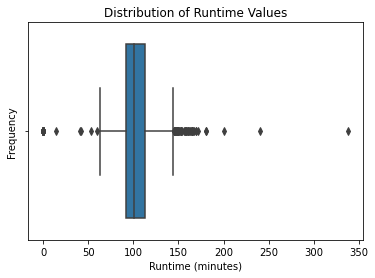

In [14]:
# View outliers
# Create a boxplot to visualize the distribution of runtime values
sns.boxplot(x=movie_dataDF['runtime'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime Values')
plt.show()

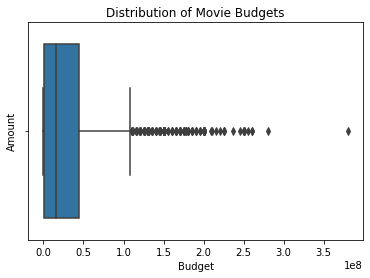

In [15]:
# View outliers
# Create a boxplot of the budget column
sns.boxplot(data=movie_dataDF, x="budget")

# Add a title and labels to the plot
plt.title("Distribution of Movie Budgets")
plt.xlabel("Budget")
plt.ylabel("Amount")

# Show the plot
plt.show()

In [16]:
#creating a dictionary called  that has three keys: , , and . The  key stores the names of the columns in the DataFrame  that have a dtype of . The  key stores the number of unique values in each of those columns. The  key stores the list of unique values for each of those columns.

#The code then uses the function to convert the dictionary into a Pandas DataFrame. This DataFrame can be used to explore the unique values in the DataFrame .
new_genres = []
for genre in list(set(movie_dataDF["genres"].unique())):
    for genre_word in str(genre).split(" "):
        new_genres.append(genre_word)
genres = list(set(new_genres))
genres.remove("Fiction")
genres[-6] = "Science Fiction"
genres.remove("nan")
print("Genres:", ", ".join(genres))

Genres: Family, Drama, Animation, Western, Horror, Thriller, History, Mystery, Fantasy, Comedy, Music, Science, Romance, War, TV, Science Fiction, Foreign, Action, Movie, Crime, Documentary


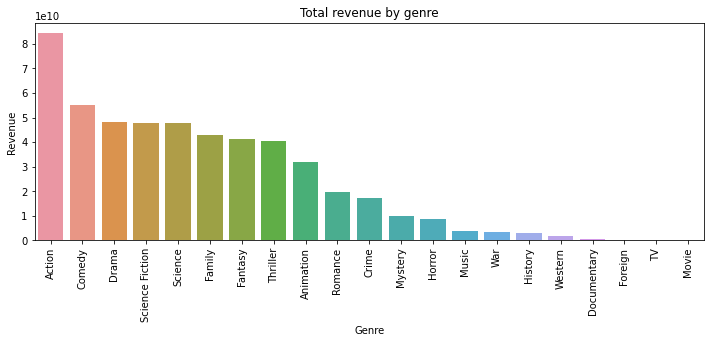

In [17]:
# Create new group and plot out revenue by genre
dict_revenues = {"Genre": [], "Revenue": []}
for genre in genres:
    dict_revenues["Genre"].append(genre)
    dict_revenues["Revenue"].append(movie_dataDF[movie_dataDF["genres"].str.contains(genre, na=False)]["revenue"].sum())

df_revenues = pd.DataFrame(dict_revenues)
df_revenues.sort_values(by=["Revenue"], ascending=False, inplace=True)

# Plot bar graph
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
ax.set_title("Total revenue by genre")
sns.barplot(data=df_revenues, x="Genre", y="Revenue", ax=ax)
ax.tick_params(axis="x", rotation=90)

plt.show()

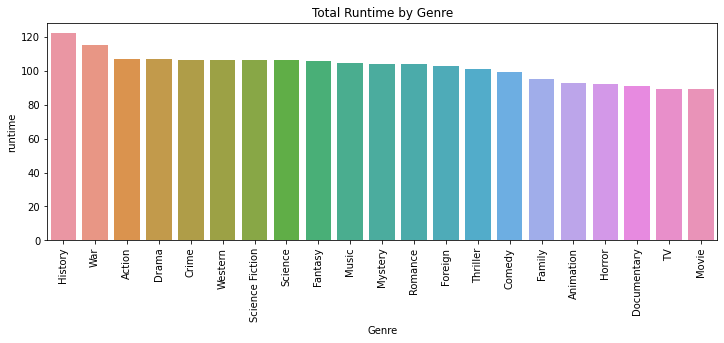

In [18]:
#Create a group to plot runtime by genre
genre_runtime = {"Genre": [], "runtime": []}
for genre in genres:
    genre_runtime["Genre"].append(genre)
    genre_runtime["runtime"].append(movie_dataDF[movie_dataDF["genres"].str.contains(genre, na=False)]["runtime"].median())
df_runtime = pd.DataFrame(genre_runtime)
df_runtime.sort_values(by=["runtime"], ascending=False, inplace=True)

#Plot bar graph
# Plot bar graph
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
ax.set_title("Total Runtime by Genre")
sns.barplot(data=df_runtime, x="Genre", y="runtime", ax=ax)
ax.tick_params(axis="x", rotation=90)
plt.show()


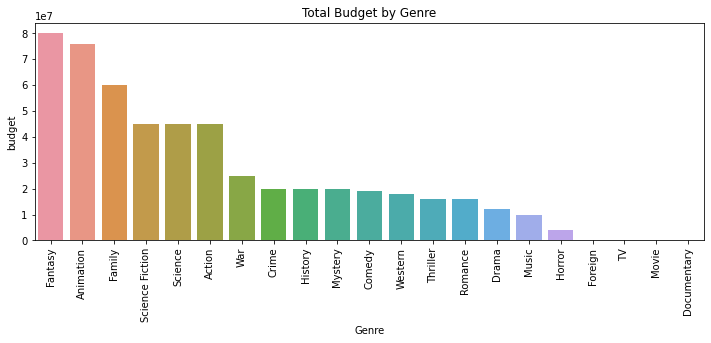

In [19]:
# Create a group to plot budget by genre
genre_runtime = {"Genre": [], "budget": []}
for genre in genres:
    genre_runtime["Genre"].append(genre)
    genre_runtime["budget"].append(movie_dataDF[movie_dataDF["genres"].str.contains(genre, na=False)]["budget"].median())

df_runtime = pd.DataFrame(genre_runtime)
df_runtime.sort_values(by=["budget"], ascending=False, inplace=True)

# Plot bar graph
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
ax.set_title("Total Budget by Genre")
sns.barplot(data=df_runtime, x="Genre", y="budget", ax=ax)
ax.tick_params(axis="x", rotation=90)

plt.show()


In [20]:
movie_dataDF["budget_revenue_ratio"] = movie_dataDF["revenue"]/movie_dataDF["budget"]
movie_dataDF.sort_values(by=["budget_revenue_ratio"], ascending=False, inplace=True)

In [ ]:
movie_dataDF.to_csv('movie_dataDF.csv')

# We also wanted to look at a colaboration between our company and an existing Production Studio.  
# We used the information found in the Box Office Mojo DataBase. 
# Below is the clean up and EDAs for the data.

In [21]:
#Imported the Box Office Mojo CSV
bomDF = pd.read_csv("C:\\Users\\lotus\\Documents\\Flatiron\\Projects\\Phase2Project\\P2ProjectFiles\\DataSets\\bom.movie_gross.csv")

bomDF

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [22]:
#View summary statistics of the data frame. 
#Noticed Outliers in the Max. 
bomDF.describe()


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [23]:
#viewed data frame of the csv file
#We can stick to domestic since foriegn is missing so much
bomDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [24]:
#Dropped Foreign Gross: not necessary and missing alot
bomDF = bomDF.drop(['foreign_gross'], axis = 1)

#Dropped any duplicate rows. (Turned out not to be any)
bomDF = bomDF.drop_duplicates()

#Dropped the few rows missing values (about 28) from domestic and studio 
bomDF = bomDF.dropna(subset=['domestic_gross', 'studio'])

#Dropped any special characters from the studios column to help combine and sort studio names.
bomDF['studio'] =  bomDF['studio'].str.replace('[^a-zA-Z0-9]', '')

bomDF

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,PDW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [25]:
#Calculated the Z-score for 'domestic_gross'
bomDF['z_score'] = (bomDF['domestic_gross'] - bomDF['domestic_gross'].mean()) / bomDF['domestic_gross'].std()

#Defined a std threshold for identifying outliers (it's usually 2 or 3)
threshold = 2 

#Identified the outliers and filtered their row's index label into outliers
outliers = bomDF[abs(bomDF['z_score']) > threshold].index

#Removed the outliers from Box Office Mojo Data Frame
cleanedBomDF = bomDF.drop(outliers)

cleanedBomDF

,title,studio,domestic_gross,year,z_score
11,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,2010,1.128667
12,The King's Speech,Wein,135500000.0,2010,1.592798
15,Prince of Persia: The Sands of Time,BV,90800000.0,2010,0.925703
16,Black Swan,FoxS,107000000.0,2010,1.167469
17,Megamind,PDW,148400000.0,2010,1.785315
...,...,...,...,...,...
3382,The Quake,Magn,6200.0,2018,-0.429288
3383,Edward II (2018 re-release),FM,4800.0,2018,-0.429309
3384,El Pacto,Sony,2500.0,2018,-0.429343
3385,The Swan,Synergetic,2400.0,2018,-0.429345


In [26]:
cleanedBomDF.describe()

,domestic_gross,year,z_score
count,3.209000e+03,3209.000000,3209.000000
mean,1.734494e+07,2013.957308,-0.170528
std,3.141535e+07,2.473371,0.468837
min,1.000000e+02,2010.000000,-0.429379
25%,1.080000e+05,2012.000000,-0.427769
50%,1.100000e+06,2014.000000,-0.412965
75%,2.080000e+07,2016.000000,-0.118965
max,1.624000e+08,2018.000000,1.994249


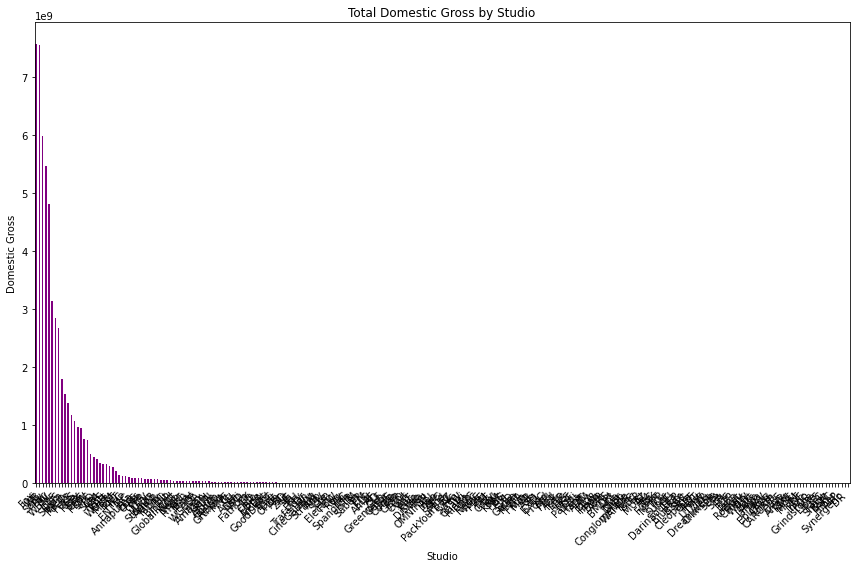

In [27]:
#Created a bar chart by grouping studio and then getting the sum of domestic gross for each studio
studioGross = cleanedBomDF.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)

#Plotted with MatPlotLib
plt.figure(figsize=(12, 8))
studioGross.plot(kind = 'bar', color = 'purple')

plt.xlabel('Studio')
plt.ylabel('Domestic Gross')
plt.title('Total Domestic Gross by Studio')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

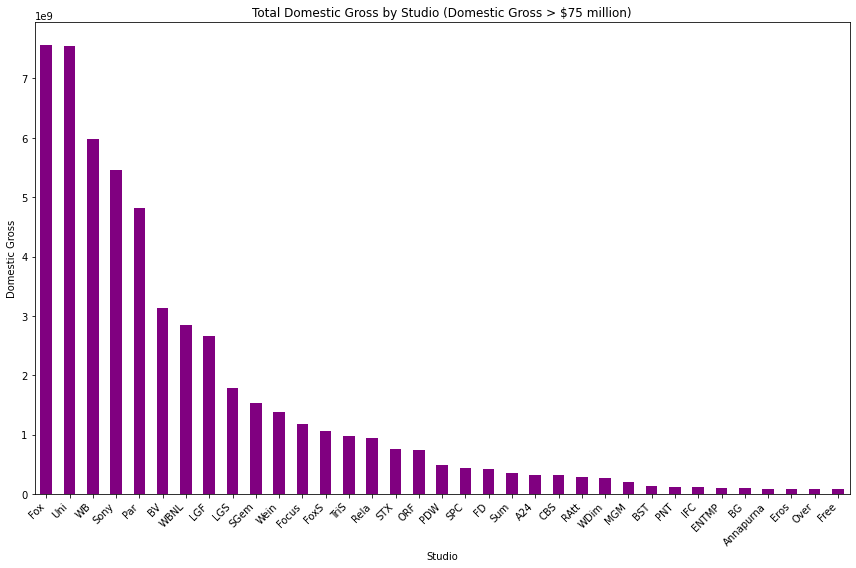

In [28]:
#Filtered the DF to include only studios with domestic gross above $75 million
studioGrossNew = studioGross[studioGross > 75e6]

#Plotted with MatPlotLib
plt.figure(figsize=(12, 8))
studioGrossNew.plot(kind = 'bar', color = 'purple')

plt.xlabel('Studio')
plt.ylabel('Domestic Gross')
plt.title('Total Domestic Gross by Studio (Domestic Gross > $75 million)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

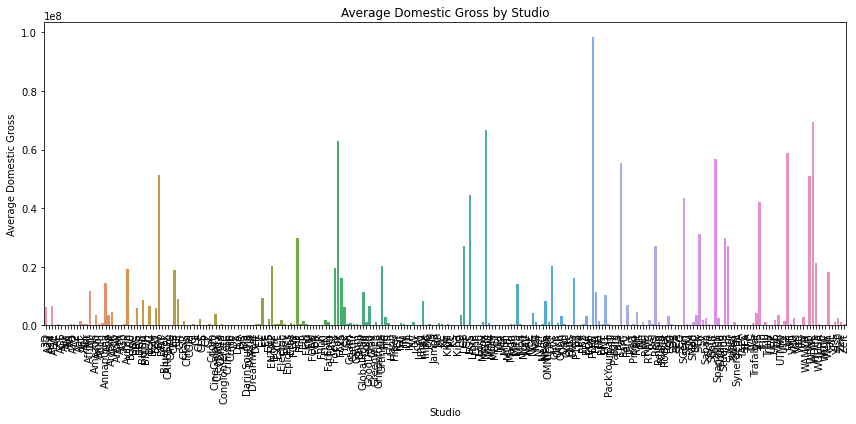

In [29]:
#Decided to calculate the average domestic gross by studio
avgDomesticStudioGross = cleanedBomDF.groupby('studio')['domestic_gross'].mean().reset_index()

#Plotted with SNS
plt.figure(figsize=(12, 6))
sns.barplot(x='studio', y='domestic_gross', data=avgDomesticStudioGross)
plt.xticks(rotation=90) 
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross')
plt.title('Average Domestic Gross by Studio')
plt.tight_layout()
plt.show()

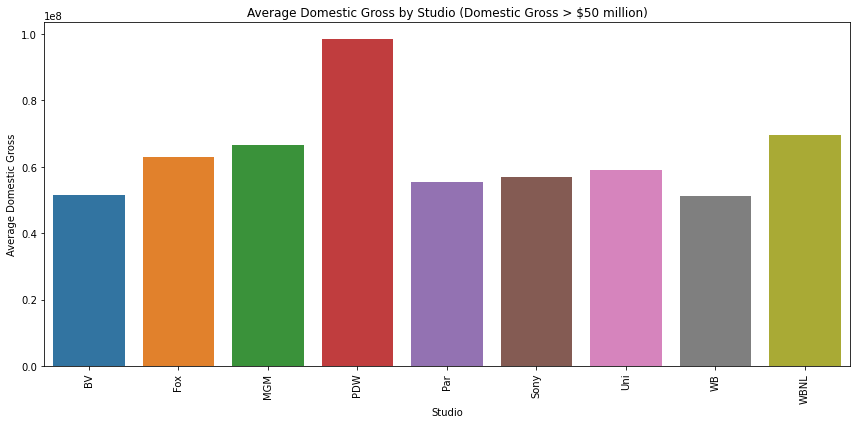

In [30]:
#Filtered to include only studios with average domestic gross above $50 million
avgGreater50 = avgDomesticStudioGross[avgDomesticStudioGross['domestic_gross'] > 5e7]  # 5e7 is equivalent to $50 million

#Plotted with SNS
plt.figure(figsize=(12, 6))
sns.barplot(x='studio', y='domestic_gross', data = avgGreater50)
plt.xticks(rotation=90)  
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross')
plt.title('Average Domestic Gross by Studio (Domestic Gross > $50 million)')
plt.tight_layout()
plt.show()

In [ ]:
cleanedBomDF.to_csv('cleanedBomDF.csv')

# Finally, we cleaned and used EDAs to compare and contrast budget vs. profit ratios.
# We used The Numbers database to achieve this.

In [31]:
budgetDF = pd.read_csv("C:\\Users\\lotus\\Documents\\Flatiron\\Projects\\Phase2Project\\P2ProjectFiles\\DataSets\\tn.movie_budgets.csv")

In [32]:
budgetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
